In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
DP_Leo_LTT_fit_weighted_data_Thiswork_K.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_b.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_e.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_e_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate.out
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate_K100.out


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
#print(len_x)
#print(x)

In [5]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [6]:
def LTT_fit(x,m,c,K,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [7]:
import scipy.optimize as optimization  
guess = (m,c,K,e,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params, params_covariance = optimization.curve_fit(LTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [8]:
m = params[0]
c = params[1]
K = params[2]
e = params[3]
b = params[4]
w = params[5]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dK = params_covariance[2,2]
de = params_covariance[3,3]
db = params_covariance[4,4]
dw = params_covariance[5,5]

ocfit = LTT_fit(x,*params)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [9]:
print("The Keplerian parameters (e = 0.13):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (e = 0.13):
m = 0.0006148077754996115 +/- 0.0004398518117357549 [s]
c = -39.27836968250542 +/- 19.735804363980765 [s]
K = 47.01369192315678 +/- 1.182379833905439 [s]
e = 0.13525377052641724 +/- 0.07845789520501215 [days]
b = 0.0005111664682947285 +/- 1.5420755195245228e-05 [rad]
w = -5.919757329295307 +/- 0.7455696722034713 [rad]
w_deg = -339.177110710257 +/- 42.71799555021115 [deg]
Pc = 12291.85734373489 +/- 70.28844753146117 [days]
Pc_yr = 33.653271303860066 +/- 0.19243928140030436 [years]
Semi-major axis = 10.423610894628863 +/- 0.03973684404599882 [AU]
Mass sin(i)Mp= 5.289844305623588 +/- 0.1576868787554597 [MJ]


In [10]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = LTT_fit(x_line, *params) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 6
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

[ -1.95878988  14.24895205  29.01263133  32.10979527  23.62593969
  19.18033847  10.51003788 -47.70245027 -50.50008509 -27.31987744
 -26.92082105 -26.37317709 -25.83564317 -23.22259063 -22.75641543
 -21.80333875 -21.07279305 -18.18480292  10.00752923  18.11863342
  30.35575739  31.42301298  31.42301298  41.70055985  44.42254774]
Reduced_chisq: 0.8097322295532281


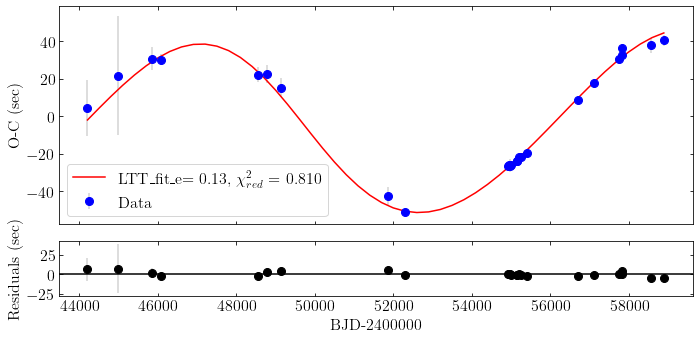

In [11]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_line, y_line, '-', color='red',label='LTT\_fit\_e= 0.13, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Residual = y-ocfit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#ax1.legend(loc="best")
#plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg", dpi=1000)
plt.show()

#### The changing parameters: e = 0

In [12]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [13]:
def LTT_fit_e0(x,m,c,K,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [14]:
import scipy.optimize as optimization  
guess = (m,c,K,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_e0, params_covariance_e0 = optimization.curve_fit(LTT_fit_e0, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [15]:
m = params_e0[0]
c = params_e0[1]
K = params_e0[2]
b = params_e0[3]
w = params_e0[4]

dm = params_covariance_e0[0,0]
dc = params_covariance_e0[1,1]
dK = params_covariance_e0[2,2]
db = params_covariance_e0[3,3]
dw = params_covariance_e0[4,4]

ocfit = LTT_fit_e0(x,*params_e0)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [16]:
print("The Keplerian parameters (e = 0):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (e = 0):
m = 0.00020522914920576764 +/- 0.0002491988619261933 [s]
c = -17.83870739563683 +/- 13.145973421037693 [s]
K = 44.675402667597446 +/- 0.7356116905882963 [s]
b = 0.0005248925461750753 +/- 1.006671620682264e-05 [rad]
w = -2.086152084222797 +/- 0.5374282008470002 [rad]
w_deg = -119.52770984838652 +/- 30.792367699842245 [deg]
Pc = 11970.422047265767 +/- 27.66458572461673 [days]
Pc_yr = 32.77322942441004 +/- 0.07574150780182541 [years]
Semi-major axis = 10.241089434443015 +/- 0.015778641468887848 [AU]
Mass sin(i)Mp= 5.028751522339042 +/- 0.06103311800257861 [MJ]


In [17]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_e0 = np.linspace(x_min, x_max)
y_line_e0 = LTT_fit_e0(x_line_e0, *params_e0) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_e0 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_e0)

[ -1.58818792  15.50876579  29.65064463  32.28969765  20.8774932
  16.92354295   9.3551824  -45.68611673 -49.58386256 -28.09574229
 -27.64741039 -27.03160634 -26.42662463 -23.4799302  -22.95354173
 -21.87702443 -21.05169821 -17.79014389  12.74573129  20.6308934
  31.16265972  31.97594359  31.97594359  38.26873134  38.92026196]
Reduced_chisq: 1.2041369041671377


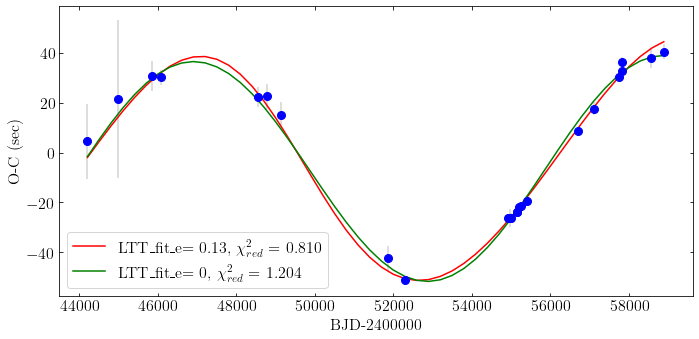

In [18]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_e= 0.13, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_e0,y_line_e0,'-g',label='LTT\_fit\_e= 0, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_e0)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: e = 0.5

In [19]:
m = 0
c = 0
K = 33.7        #m/s
e = 0.5               #No-unit
b = 0.0005
w = -1.36     #rad

In [20]:
def LTT_fit_e0p5(x,m,c,K,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [21]:
import scipy.optimize as optimization  
guess = (m,c,K,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_e0p5, params_covariance_e0p5 = optimization.curve_fit(LTT_fit_e0p5, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [22]:
m = params_e0p5[0]
c = params_e0p5[1]
K = params_e0p5[2]
b = params_e0p5[3]
w = params_e0p5[4]

dm = params_covariance_e0p5[0,0]
dc = params_covariance_e0p5[1,1]
dK = params_covariance_e0p5[2,2]
db = params_covariance_e0p5[3,3]
dw = params_covariance_e0p5[4,4]

ocfit = LTT_fit_e0p5(x,*params_e0p5)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [23]:
print("The Keplerian parameters (e = 0.5):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (e = 0.5):
m = -0.00024107762827955324 +/- 0.00026941318170745337 [s]
c = -7.132429407428836 +/- 14.15879160879433 [s]
K = 41.603660432169455 +/- 0.8428299589537599 [s]
b = 0.00048564304122998445 +/- 1.0971295275162684e-06 [rad]
w = -4.502883232922431 +/- 0.07673000062837496 [rad]
w_deg = -257.9962048866789 +/- 4.39630519804204 [deg]
Pc = 12937.867474155937 +/- 0.41488146549477006 [days]
Pc_yr = 35.42195064792865 +/- 0.001135883546871376 [years]
Semi-major axis = 10.785699487534103 +/- 0.00023057827825762674 [AU]
Mass sin(i)Mp= 4.162027588615661 +/- 0.07258769770001004 [MJ]


In [24]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_e0p5 = np.linspace(x_min, x_max)
y_line_e0p5 = LTT_fit_e0p5(x_line_e0p5, *params_e0p5) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_e0p5 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_e0p5)

[ 23.37549685  40.07370979  41.80541618  38.84036664 -13.0579698
 -16.40150459 -21.55076752 -40.21230185 -40.74701681 -27.72100647
 -27.45031794 -27.0752607  -26.70306949 -24.83540429 -24.49184337
 -23.77948641 -23.22430638 -20.95020717   8.40526273  18.88629451
  33.99933137  35.10461958  35.10461958  40.25422601  37.6407985 ]
Reduced_chisq: 15.618429350343089


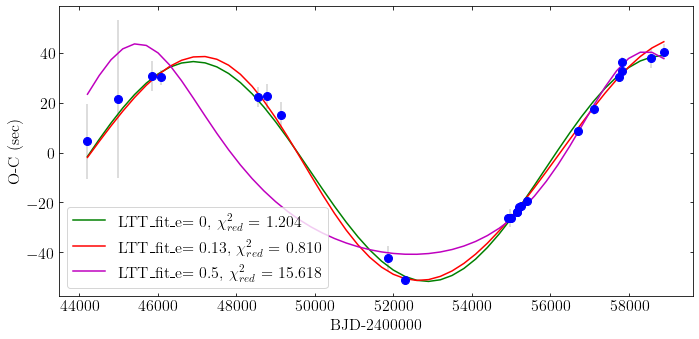

In [25]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line_e0,y_line_e0,'-g',label='LTT\_fit\_e= 0, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_e0)))
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_e= 0.13, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_e0p5,y_line_e0p5,'-m',label='LTT\_fit\_e= 0.5, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_e0p5)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: e = 0.9

In [26]:
m = 0
c = 0
K = 33.7        #m/s
e = 0.9               #No-unit
b = 0.0005
w = -1.36     #rad

In [27]:
def LTT_fit_e0p9(x,m,c,K,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [28]:
import scipy.optimize as optimization  
guess = (m,c,K,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_e0p9, params_covariance_e0p9 = optimization.curve_fit(LTT_fit_e0p9, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [29]:
m = params_e0p9[0]
c = params_e0p9[1]
K = params_e0p9[2]
b = params_e0p9[3]
w = params_e0p9[4]

dm = params_covariance_e0p9[0,0]
dc = params_covariance_e0p9[1,1]
dK = params_covariance_e0p9[2,2]
db = params_covariance_e0p9[3,3]
dw = params_covariance_e0p9[4,4]

ocfit = LTT_fit_e0p9(x,*params_e0p9)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [30]:
print("The Keplerian parameters (e = 0.9):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (e = 0.9):
m = -0.0009298644365566402 +/- 0.00036426155264147615 [s]
c = 19.659228276781832 +/- 18.94467287144928 [s]
K = -64.50824473270961 +/- 6.6535861042115725 [s]
b = 0.0004828113512838941 +/- 3.950909580368872e-07 [rad]
w = -8.607280720155444 +/- 0.10608166231528886 [rad]
w_deg = -493.16085834923075 +/- 6.078031534398044 [deg]
Pc = 13013.748103625385 +/- 0.05475471231597523 [days]
Pc_yr = 35.629700489049654 +/- 0.00014991023221348453 [years]
Semi-major axis = 10.827830476781854 +/- 3.0371713464940747e-05 [AU]
Mass sin(i)Mp= -3.2544782341053486 +/- -2.2338405826004237 [MJ]


In [31]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_e0p9 = np.linspace(x_min, x_max)
y_line_e0p9 = LTT_fit_e0p9(x_line_e0p9, *params_e0p9) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_e0p9 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_e0p9)

[ 22.029456    59.89461479  46.54183592  26.56278327 -33.63548522
 -34.0580618  -34.52226858 -33.66183856 -33.15883287 -25.78401147
 -25.66680761 -25.50427742 -25.34279693 -24.52832375 -24.37753419
 -24.06370563 -23.81791873 -22.79816876  -5.22060604   5.45191979
  34.00852805  37.42179509  37.42179509  54.63390004  32.83056358]
Reduced_chisq: 41.673503579141524


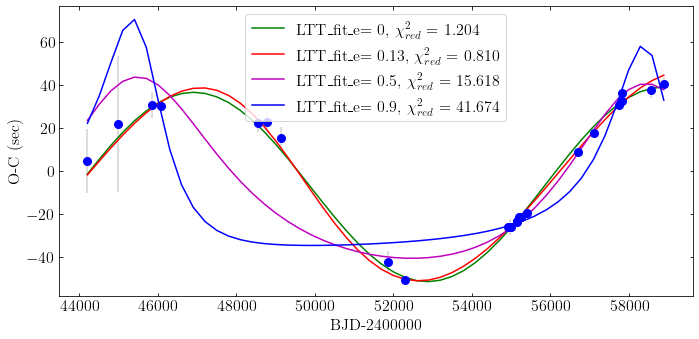

In [32]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line_e0,y_line_e0,'-g',label='LTT\_fit\_e= 0, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_e0)))
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_e= 0.13, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_e0p5,y_line_e0p5,'-m',label='LTT\_fit\_e= 0.5, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_e0p5)))
plt.plot(x_line_e0p9,y_line_e0p9,'-b',label='LTT\_fit\_e= 0.9, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_e0p9)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_e_Res.jpg", dpi=1000)
plt.show()